# Foundations of Machine Learning Frameworks Lab-4
Name: Devanshi Joshi   
Id: 8868052

In [57]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

In [58]:
# Importing the dataset 
X, y = datasets.load_diabetes(as_frame=True, scaled=False, return_X_y=True)
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0


In [59]:
# Splitting the dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Defining a method for calculating MAPE 
def MAPE(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#### 1. Multivariate Linear Regression on all variables

In [61]:
MLR_Model = LinearRegression()
MLR_Model.fit(X_train, y_train)
y_pred_MLR = MLR_Model.predict(X_test)
y_pred_train_MLR = MLR_Model.predict(X_train)

Metrics for the Multivariate Linear Regression on all variables for both the training and testing sets 

In [62]:
# Metrics for the testing set
r2_test_MLR = r2_score(y_test, y_pred_MLR)
mae_test_MLR = mean_absolute_error(y_test, y_pred_MLR)
mape_test_MLR = MAPE(y_test, y_pred_MLR)

# Metrics for the training set
r2_train_MLR = r2_score(y_train, y_pred_train_MLR)
mae_train_MLR = mean_absolute_error(y_train, y_pred_train_MLR)
mape_train_MLR = MAPE(y_train, y_pred_train_MLR)

print("Metrics for Multivariate Linear Regression (Training set):")
print(f"R-squared: {r2_train_MLR:.2f}")
print(f"MAE: {mae_train_MLR:.2f}")
print(f"MAPE: {mape_train_MLR:.2f}%\n")

print("Metrics for Multivariate Linear Regression (Testing set):")
print(f"R-squared: {r2_test_MLR:.2f}")
print(f"MAE: {mae_test_MLR:.2f}")
print(f"MAPE: {mape_test_MLR:.2f}%")

Metrics for Multivariate Linear Regression (Training set):
R-squared: 0.53
MAE: 43.48
MAPE: 38.92%

Metrics for Multivariate Linear Regression (Testing set):
R-squared: 0.45
MAE: 42.79
MAPE: 37.50%


#### Plot with Regression Line

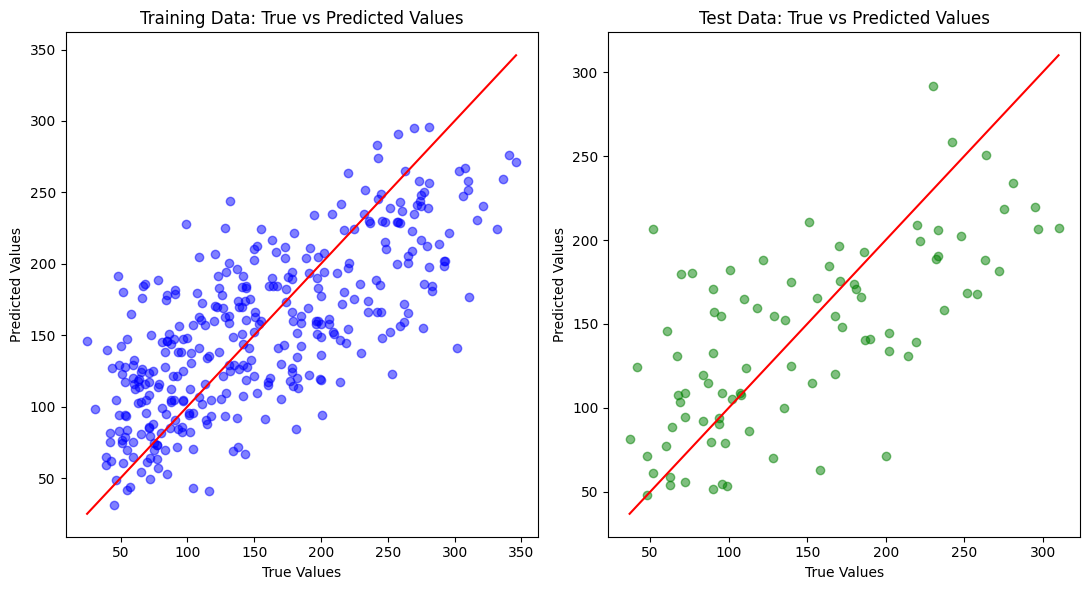

In [74]:
import matplotlib.pyplot as plt
plt.figure(figsize=(11, 6))

# Training Data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train_MLR, color='blue', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red') 
plt.title('Training Data: True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# Testing Data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_MLR, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Test Data: True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()


#### 2. Polynomial Regression of the 2nd degree on the BMI feature alone


In [63]:
X_train_bmi = X_train[["bmi"]]
X_test_bmi = X_test[["bmi"]]

PL_Model_Features = PolynomialFeatures(degree=2)
X_train_bmi_poly = PL_Model_Features.fit_transform(X_train_bmi)
X_test_bmi_poly = PL_Model_Features.transform(X_test_bmi)

PL_Model_bmi = LinearRegression()
PL_Model_bmi.fit(X_train_bmi_poly, y_train)
y_pred_bmi_poly = PL_Model_bmi.predict(X_test_bmi_poly)
y_pred_train_bmi_poly = PL_Model_bmi.predict(PL_Model_Features.transform(X_train_bmi))

Metrics for the Polynomial Regression of the 2nd degree on the BMI feature for both the training and testing sets 

In [64]:
# Metrics for the testing set
r2_test_bmi_poly = r2_score(y_test, y_pred_bmi_poly)
mae_test_bmi_poly = mean_absolute_error(y_test, y_pred_bmi_poly)
mape_test_bmi_poly = MAPE(y_test, y_pred_bmi_poly)

# Metrics for the training set
r2_train_bmi_poly = r2_score(y_train, y_pred_train_bmi_poly)
mae_train_bmi_poly = mean_absolute_error(y_train, y_pred_train_bmi_poly)
mape_train_bmi_poly = MAPE(y_train, y_pred_train_bmi_poly)

# Print the metrics
print("Metrics for Polynomial Regression based on BMI (Training set):")
print(f"R-squared: {r2_train_bmi_poly:.2f}")
print(f"MAE: {mae_train_bmi_poly:.2f}")
print(f"MAPE: {mape_train_bmi_poly:.2f}%\n")

print("Metrics for Polynomial Regression based on BMI (Testing set):")
print(f"R-squared: {r2_test_bmi_poly:.2f}")
print(f"MAE: {mae_test_bmi_poly:.2f}")
print(f"MAPE: {mape_test_bmi_poly:.2f}%")

Metrics for Polynomial Regression based on BMI (Training set):
R-squared: 0.37
MAE: 51.33
MAPE: 47.52%

Metrics for Polynomial Regression based on BMI (Testing set):
R-squared: 0.23
MAE: 52.38
MAPE: 46.00%


#### 3. Multivariate Polynomial Regression of the 2nd degree on all variables

In [65]:
MV_PL_Model_Features = PolynomialFeatures(degree=2)
X_train_poly = MV_PL_Model_Features.fit_transform(X_train)
X_test_poly = MV_PL_Model_Features.transform(X_test)

MV_PL_Model = LinearRegression()
MV_PL_Model.fit(X_train_poly, y_train)
y_pred_poly = MV_PL_Model.predict(X_test_poly)
y_pred_train_poly = MV_PL_Model.predict(MV_PL_Model_Features.transform(X_train))

#### Metrics for the Multivariate Polynomial Regression of the 2nd degree

In [66]:
# Metrics for the testing set
r2_test_poly = r2_score(y_test, y_pred_poly)
mae_test_poly = mean_absolute_error(y_test, y_pred_poly)
mape_test_poly = MAPE(y_test, y_pred_poly)

# Metrics for the training set
r2_train_poly = r2_score(y_train, y_pred_train_poly)
mae_train_poly = mean_absolute_error(y_train, y_pred_train_poly)
mape_train_poly = MAPE(y_train, y_pred_train_poly)

print("Metrics for Multivariate Polynomial Regression (Training set):")
print(f"R-squared: {r2_train_poly:.2f}")
print(f"MAE: {mae_train_poly:.2f}")
print(f"MAPE: {mape_train_poly:.2f}%\n")

print("Metrics for Multivariate Polynomial Regression (Testing set):")
print(f"R-squared: {r2_test_poly:.2f}")
print(f"MAE: {mae_test_poly:.2f}")
print(f"MAPE: {mape_test_poly:.2f}%")

Metrics for Multivariate Polynomial Regression (Training set):
R-squared: 0.61
MAE: 39.14
MAPE: 34.39%

Metrics for Multivariate Polynomial Regression (Testing set):
R-squared: 0.42
MAE: 43.58
MAPE: 38.29%


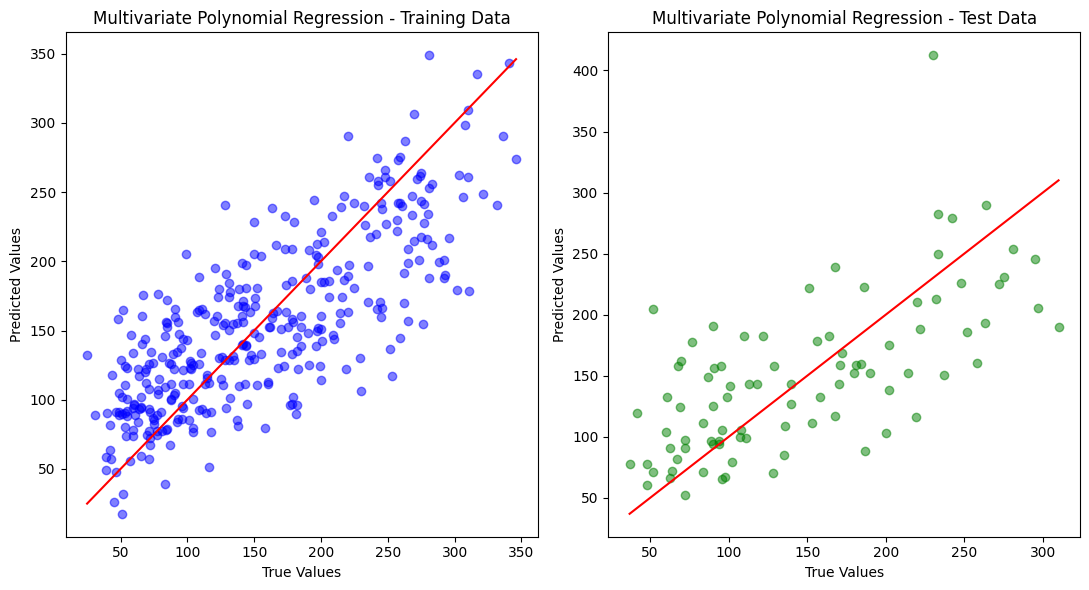

In [77]:
plt.figure(figsize=(11, 6))

# For Training Data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train_poly, color='blue', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red') 
plt.title('Multivariate Polynomial Regression - Training Data')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# For Testing Data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_poly, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') 
plt.title('Multivariate Polynomial Regression - Test Data')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()


In [67]:
def model_estimation(model, y_train, y_test, y_pred_train, y_pred_test):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    # plot a scatter plot of the residuals
    ax1.scatter(y_test, y_test - y_pred_test)
    ax1.set_xlabel('$y_{test}$')
    ax1.set_ylabel('Residual $*(y{test} - y{pred}) / y{test})$')
    ax1.set_title('Residuals')

    # plot a scatter plot of the percentage error
    ax2.scatter(y_test, 100. * (y_test - y_pred_test) / y_test)
    ax2.set_xlabel('$y_{test}$')
    ax2.set_ylabel('percentage error $100*(y{test} - y{pred}) / y{test})$')
    ax2.set_title('Percentage error (%)')
    
    # plot a histogram of the percentage error
    ax3.hist(100. * (y_test - y_pred_test) / y_test, bins=20)
    ax3.set_xlabel('percentage error $100*(y{test} - y{pred}) / y{test})$')
    ax3.set_ylabel('Frequency (number of test samples)')
    ax3.set_title('Histogram of percentage error (%)')

    print(f'Test Dataset: Mean Absolute Error: {mean_absolute_error(y_test, y_pred_test):.2f}')
    print(f'Train Dataset: Mean Absolute Error: {mean_absolute_error(y_train, y_pred_train):.2f}')

    # print the equation
    print('y = ', end='')
    for i, coef in enumerate(model.coef_):
        print(f'{coef:.2f} * x{i} + ', end='')
    print(f'{model.intercept_:.2f}')
    fig.tight_layout()

#### Graphs for the Multivariate Linear Regression on all variables

Linear Regression Model Estimations:

Test Dataset: Mean Absolute Error: 42.79
Train Dataset: Mean Absolute Error: 43.48
y = 0.14 * x_0 + -23.06 * x_1 + 5.85 * x_2 + 1.20 * x_3 + -1.28 * x_4 + 0.81 * x_5 + 0.60 * x_6 + 10.16 * x_7 + 67.11 * x_8 + 0.20 * x_9 + -341.38


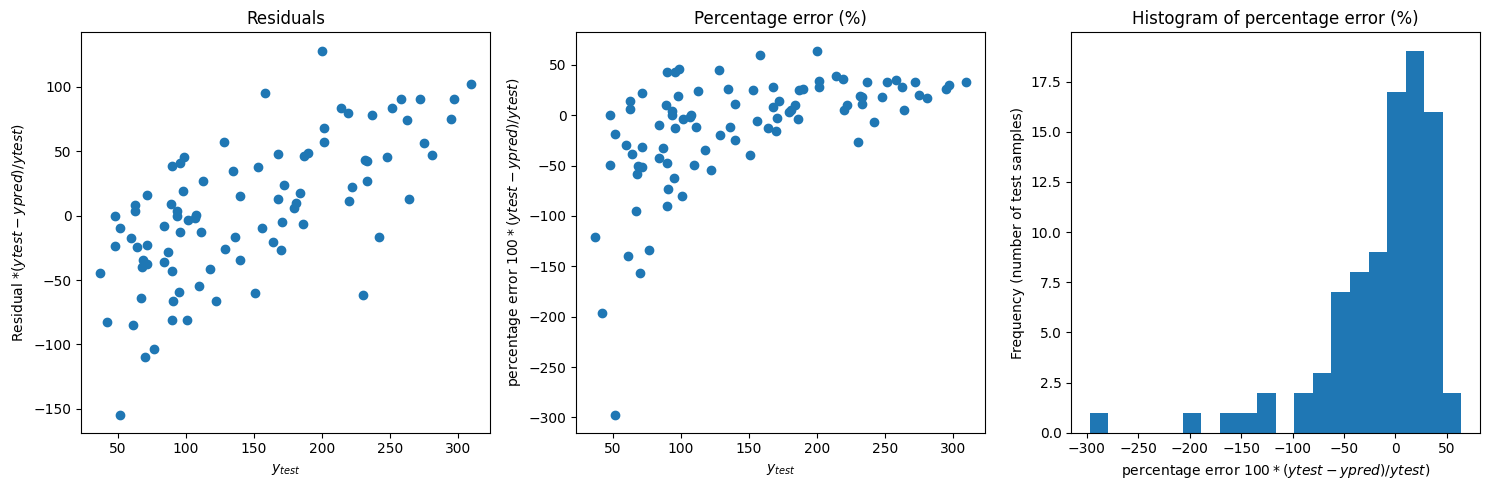

In [68]:
print("Linear Regression Model Estimations:\n")
model_estimation(MLR_Model, y_train, y_test, MLR_Model.predict(X_train), y_pred_MLR)
plt.show()


#### Graphs for the Polynomial Regression of the 2nd degree on the BMI feature alone


Polynomial Regression on BMI Model Estimations:

Test Dataset: Mean Absolute Error: 52.38
Train Dataset: Mean Absolute Error: 51.33
y = 0.00 * x_0 + 5.84 * x_1 + 0.09 * x_2 + -65.27


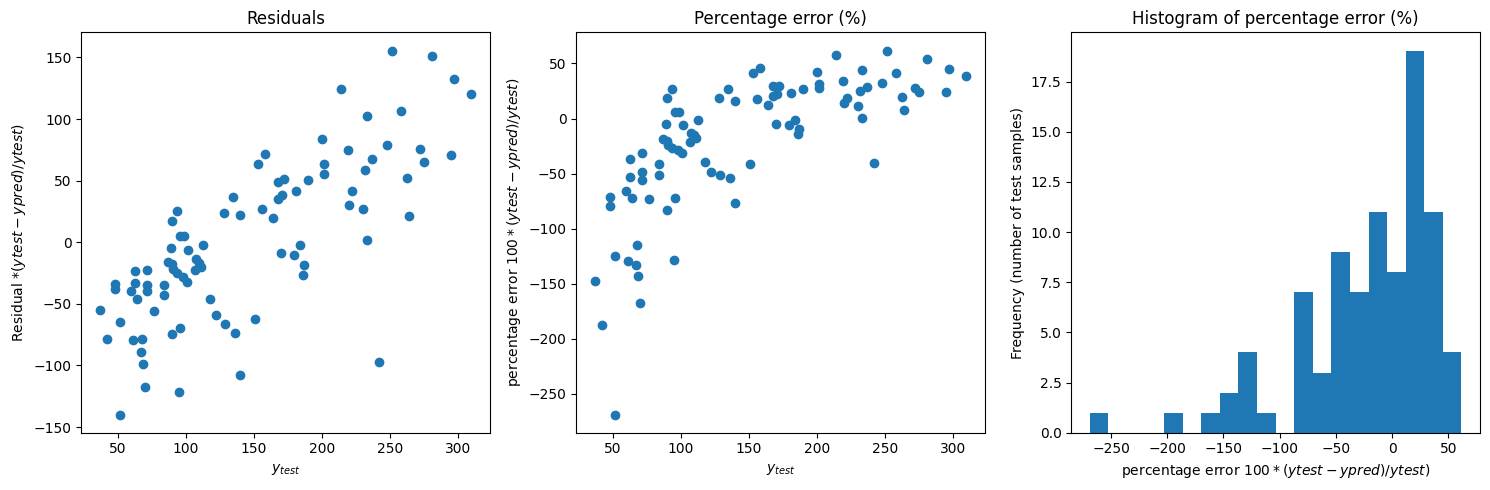

In [69]:
print("\nPolynomial Regression on BMI Model Estimations:\n")
model_estimation(PL_Model_bmi, y_train, y_test, PL_Model_bmi.predict(X_train_bmi_poly), y_pred_bmi_poly)
plt.show()

#### Graphs for the Multivariate Polynomial Regression of the 2nd degree on all variables


Multivariate Polynomial Regression Model Estimations:

Test Dataset: Mean Absolute Error: 43.58
Train Dataset: Mean Absolute Error: 39.14
y = 0.00 * x_0 + -9.59 * x_1 + -11.24 * x_2 + -19.70 * x_3 + 10.64 * x_4 + -16.59 * x_5 + 26.14 * x_6 + 11.13 * x_7 + -160.29 * x_8 + -1768.67 * x_9 + -13.82 * x_10 + 0.03 * x_11 + 0.53 * x_12 + -0.05 * x_13 + 0.01 * x_14 + -0.00 * x_15 + -0.04 * x_16 + 0.08 * x_17 + 1.31 * x_18 + 0.41 * x_19 + 0.01 * x_20 + -33.71 * x_21 + 0.36 * x_22 + 0.41 * x_23 + 0.21 * x_24 + 0.25 * x_25 + -1.24 * x_26 + -26.74 * x_27 + 18.52 * x_28 + 0.27 * x_29 + 0.09 * x_30 + 0.12 * x_31 + -0.09 * x_32 + 0.12 * x_33 + -0.01 * x_34 + -1.43 * x_35 + 3.63 * x_36 + 0.02 * x_37 + -0.00 * x_38 + 0.09 * x_39 + -0.08 * x_40 + -0.11 * x_41 + -0.18 * x_42 + -2.48 * x_43 + -0.05 * x_44 + 0.18 * x_45 + -0.28 * x_46 + -0.31 * x_47 + -1.28 * x_48 + -5.05 * x_49 + -0.04 * x_50 + 0.11 * x_51 + 0.20 * x_52 + 0.37 * x_53 + 3.38 * x_54 + 0.03 * x_55 + 0.15 * x_56 + 2.20 * x_57 + 4.46 * x_58 +

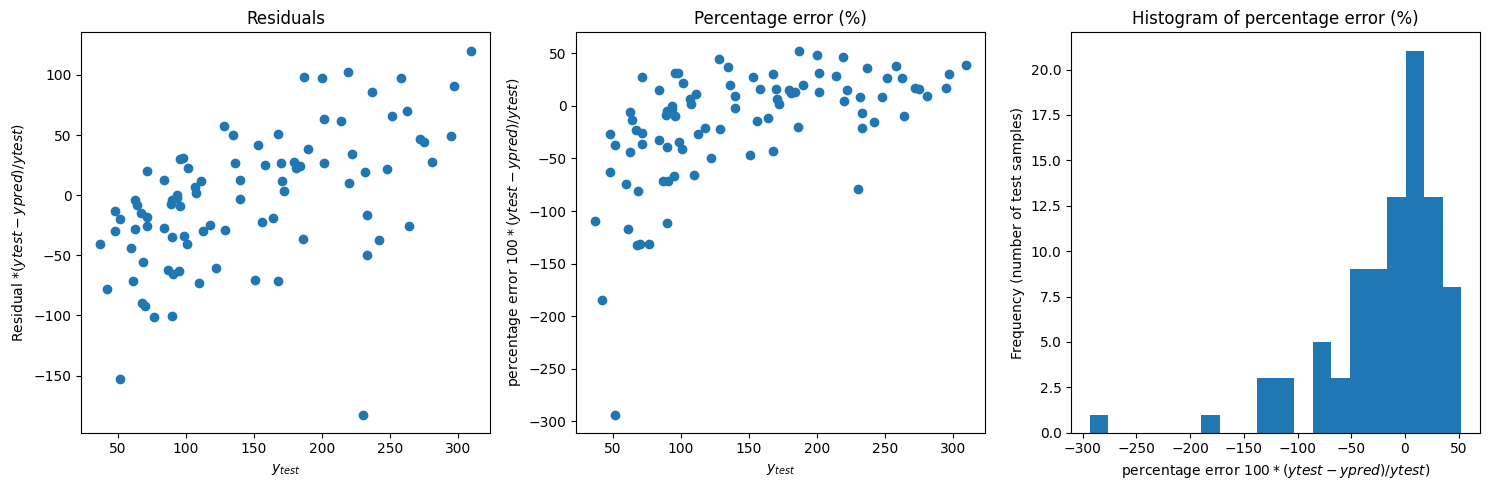

In [70]:
print("\nMultivariate Polynomial Regression Model Estimations:\n")
model_estimation(MV_PL_Model, y_train, y_test, MV_PL_Model.predict(X_train_poly), y_pred_poly)
plt.show()

In [71]:
feature_names = MV_PL_Model_Features.get_feature_names_out()
print("Number of features in MV_PL:", len(feature_names))

Number of features in MV_PL: 66


- R-squared (R2): This is a measure of how well the model explains the variability of variable that we are trying to predict. A greater R2 suggests a more good fit. An R2 of 1 indicates that the model explains 100% of the variation, whereas an R2 of 0 indicates that the model explains none.
- Mean Absolute Error (MAE): It is the average of the absolute deviations between the expected and actual values. A lower MAE suggests that the model produces less errors.
- Mean Absolute Percentage Error (MAPE): It illustrates how far wrong the model's predictions are as a percentage of the actual values. The lower the value of MAPE the model suggests to be more accurate.

Insights 
- The R2 for the training set is the highest for Multivariate Polynomial Regression, indicating that it best captures the training data. On the testing set its R2 is lower than that of Multivariate Linear Regression, indicating overfitting.
- The Polynomial Regression model based just on BMI has the lowest R2, indicating that it captures less variability in the outcome than the other models.
- The MAE and MAPE measures support this information, with Multivariate Polynomial Regression having the lowest average error on the training set but the highest on the testing set when compared to MLR.



The Parameters in the Models:
- Linear models have one coefficient for each original feature, and each model also has an intercept term. The total number of parameters is equal to the number of original features plus one for the intercept. So the total parameters are 11. 
- A degree 2 polynomial transformation on a single feature (BMI) yields the original BMI, its square (BMI^2), and an intercept, resulting in a total of 3 parameters. So the total parameters are 3 
- The model's parameters are calculated using the get_feature_names_out() function, which provides the number of polynomial features and the intercept term, resulting in a total of 67 parameter.

The three models of Multivariate Linear Regression (MLR), Polynomial Regression based on BMI, and Multivariate Polynomial Regression (MV_PL) are analyzed for their performance. MLR has a relatively close R-squared value for both training and testing sets, indicating decent prediction accuracy.   
It is the simplest model with 11 parameters and is easy to interpret. Polynomial Regression has the lowest R-squared and highest error values, indicating poor predictive performance.   
MV_PL has the highest R-squared for the training set but may be overfitting. It is the most complex model with 67 parameters and is the least interpretable due to its high number of features, interactions, and polynomial terms.

Recommendation:   
The Polynomial Regression based on BMI has lower performance, while Multivariate Polynomial Regression captures training data well but has a drop in performance on testing. Multivariate Linear Regression offers a balance with fewer parameters, making it more interpretable and less prone to overfitting, and showing stable performance on both sets.